<a href="https://colab.research.google.com/github/Masoud0389/Masoud0389/blob/main/Delay_Detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#!pwd

In [53]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_V_Delay10.csv')
X = dataset.iloc[80000:,:]
#print(X)

# Feature Scaling

In [54]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Feature Selection/Reduction

In [65]:
from sklearn.decomposition import PCA
#from sklearn.feature_selection import VarianceThreshold
#Y = VarianceThreshold(threshold=(.0010 * (1 - .0010)))
#X = Y.fit_transform(X)
#print(X)
print(np.shape(X_normalized))
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns=['PC1','PC2']
#cdict = {0: 'red', 1: 'blue'}
#X_principal.columns = ['P1', 'P2']
print(X_principal.head())
print(np.shape(X_principal))

(320000, 363)
          0         1
0  0.551364 -0.060830
1  0.551364 -0.060815
2  0.551364 -0.060830
3  0.551364 -0.060830
4  0.551368 -0.060795
(320000, 2)


# Plot Test

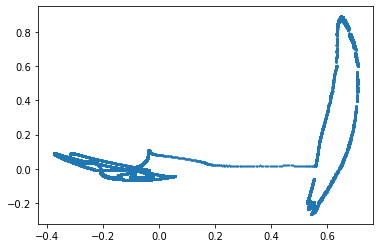

In [66]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s = 1 , alpha=1)

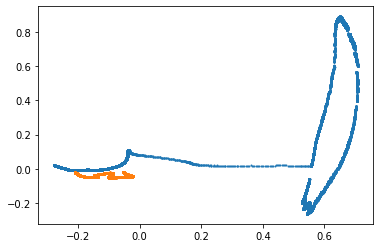

In [67]:
plt.scatter(X_principal.iloc[:120000,0], X_principal.iloc[:120000,1], s = 1 , alpha=1)
plt.scatter(X_principal.iloc[260000:360000,0], X_principal.iloc[260000:360000,1], s = 1 , alpha=1)

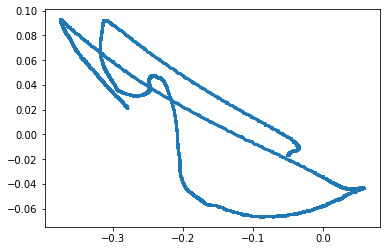

In [68]:

#print(X_principal.iloc[:,0])
plt.scatter(X_principal.iloc[120000:260000,0], X_principal.iloc[120000:260000,1], s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

# Anomaly Detection

In [18]:
from sklearn.cluster import DBSCAN
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.005, min_samples = 30).fit(X_principal)
labels = db_default.labels_

KeyboardInterrupt: ignored

In [17]:
#np. set_printoptions(threshold=np. inf)
print(np.where(labels == -1))
print(labels[125000]) ### 120,000 - 260,000

(array([ 16061,  16062,  16063, ..., 359997, 359998, 359999]),)
-1


# Visualization

In [14]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

KeyError: ignored